# BTC Analysis

### Data extraction

In [1]:
# importing necessary libraries

# for data extraction and visualization
import pandas as pd
import pandas_datareader as pdd
import datetime as dt
import matplotlib.pyplot as plt

# for data scaling and transformation
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# for model development and evaluation
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score as r2

In [2]:
# This extracts the BTC cryptocurrency 
cryptocurrency = 'BTC'
currency = 'USD'

In [3]:
# This sets the date
start = '2014-01-01'
end = dt.datetime.now()

In [4]:
# This calls the data from yahoo finance and saves the live data in the 'data' variable
data = pdd.DataReader(f'{cryptocurrency}-{currency}', 'yahoo', start, end)

In [5]:
# The first 5 records of the BTC data
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


### Descriptive Analysis

In [6]:
# This shows the number of rows and columns present in the data
data.shape

(2870, 6)

In [7]:
# This gives more infomation about the data. It shows the number of records, data type of each column and the number of values
# in each column which shows that there are no missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2870 entries, 2014-09-17 to 2022-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2870 non-null   float64
 1   Low        2870 non-null   float64
 2   Open       2870 non-null   float64
 3   Close      2870 non-null   float64
 4   Volume     2870 non-null   int64  
 5   Adj Close  2870 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 157.0 KB


In [8]:
# This shows statistical values (mean, standard deviation, minimum and maximum values, median, etc) on each of the columns
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2870.000000,2870.000000,2870.000000,2870.000000,2.870000e+03,2870.000000
mean,12820.636441,12131.201756,12495.769609,12501.313004,1.553953e+10,12501.313004
std,16972.442519,16049.657695,16545.272285,16540.811510,1.990745e+10,16540.811510
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,646.585007,631.232971,639.636002,640.012009,8.696340e+07,640.012009
50%,6727.711914,6468.584961,6598.294922,6597.044922,5.955402e+09,6597.044922
75%,11962.027344,11404.561035,11706.405029,11734.404297,2.648299e+10,11734.404297
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


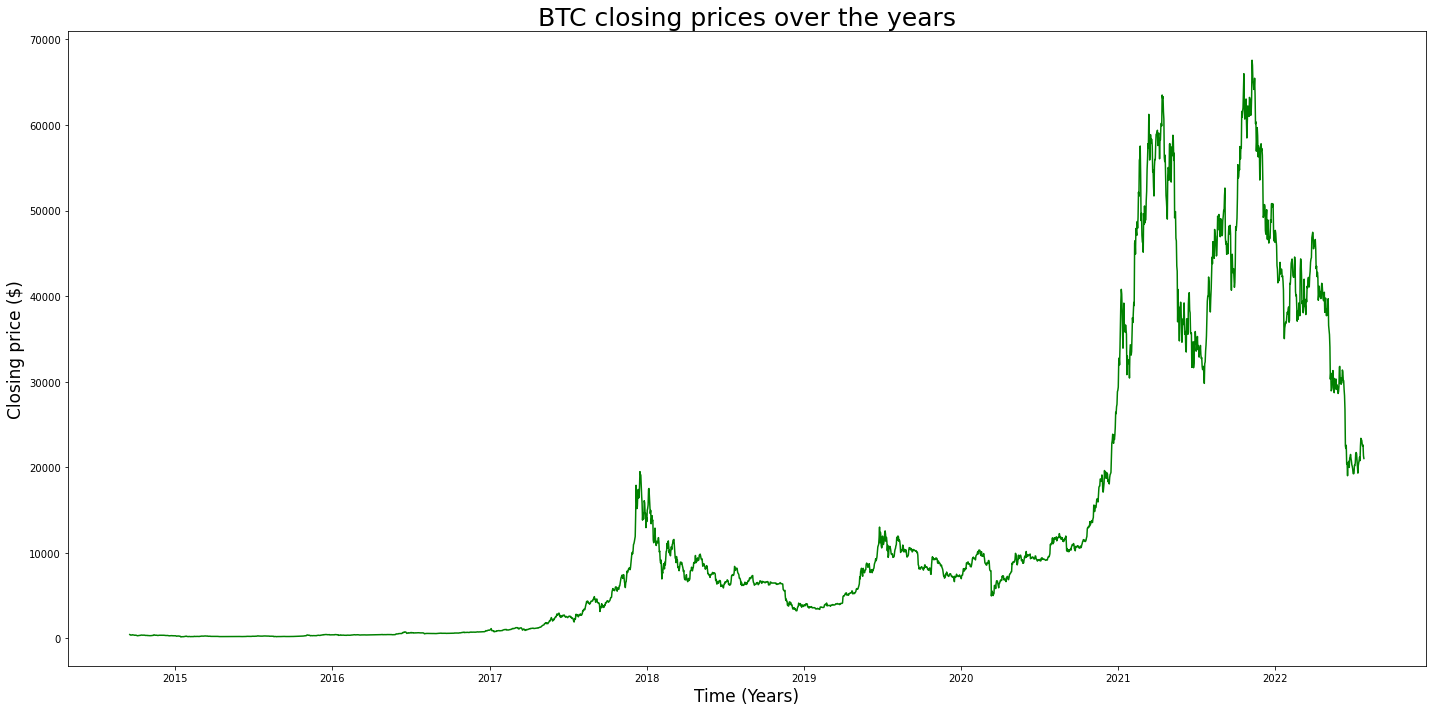

In [9]:
# This shows the closing prices of BTC over the years from 2014-09-17 till the current day
plt.figure(figsize=(20,10))

plt.plot(data.Close, color='green')
plt.xlabel('Time (Years)', fontsize=17)
plt.ylabel('Closing price ($)', fontsize=17)
plt.title('BTC closing prices over the years', fontsize=25)

plt.tight_layout()
plt.show()


In [33]:
# Setting variables for moving average 
# Moving average helps to smoothen price flunctuations to help differentiate between the flunctuations and the real trend.
# It can also help to forecast future prices.

MA100 = data.Close.rolling(100).mean()
MA200 = data.Close.rolling(200).mean()
MA300 = data.Close.rolling(300).mean()
MA400 = data.Close.rolling(400).mean()
MA500 = data.Close.rolling(500).mean()
MA600 = data.Close.rolling(600).mean()

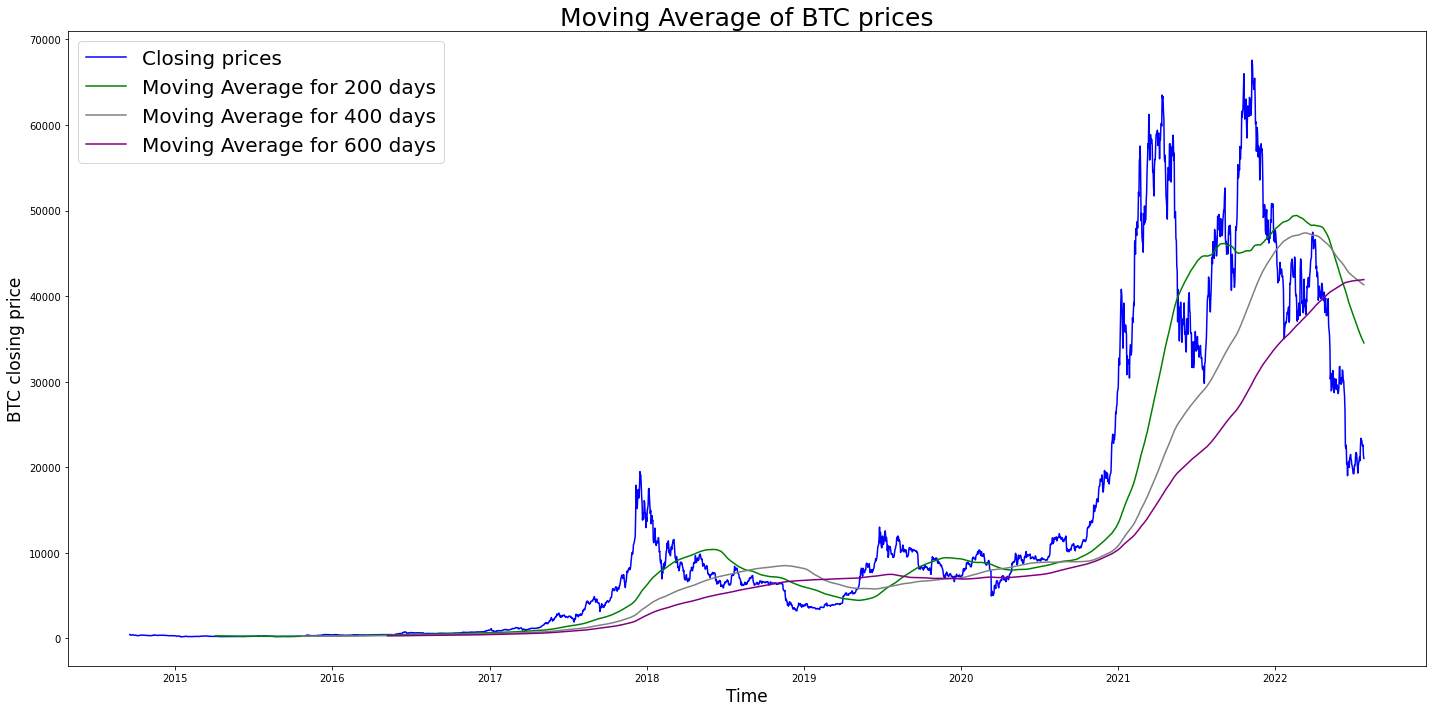

In [11]:
# This shows the moving average from 100 to 600 days

plt.figure(figsize=(20,10))

plt.plot(data.Close, color='blue', label='Closing prices')
# plt.plot(MA100, 'red', label='Moving Average for 100 days')
plt.plot(MA200, 'green', label='Moving Average for 200 days')
# plt.plot(MA300, 'black', label='Moving Average for 300 days')
plt.plot(MA400, 'grey', label='Moving Average for 400 days')
# plt.plot(MA500, 'brown', label='Moving Average for 500 days')
plt.plot(MA600, 'purple', label='Moving Average for 600 days')


plt.xlabel('Time', fontsize=17)
plt.ylabel('BTC closing price', fontsize=17)
plt.title('Moving Average of BTC prices', fontsize=25)

plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()


### Data Scaling and Transformation

In [12]:
# scaling the data using MinMax scaler within the range of -1 and 1
# Min Max scaler is best because it meets the default activation function of the LSTM model.
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [13]:
# setting prediction days and training data 
prediction_days = 60
x_train, y_train = [], []

In [14]:
# Creating a data structure for the training data
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [15]:
# reshaping the training data to fit the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###  Model Development and Evaluation

In [16]:
# ---------------------------------------------------LSTM----------------------------------------------------------------------
# 
model = Sequential()
    
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dropout(0.2))
model.add(Dense(units=1))



### Hyperparameter tuning

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# scorers = {
#         'precision_score': make_scorer(precision_score),
#         'recall_score': make_scorer(recall_score),
#         'accuracy_score': make_scorer(accuracy_score)
#         }

# activation_funcs = ['sigmoid', 'relu', 'tanh']
# loss_funcs = ['binary_crossentropy', 'hinge']
# param_grid = dict(n_layers=[2,3],
#                   first_layer_nodes = [64,32,16],
#                   last_layer_nodes = [4],
#                   activation_func = activation_funcs,
#                  loss_func = loss_funcs,
#                  batch_size = [100],
#                  epochs = [20,60])
# grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scorers, refit='precision_score')

# grid.fit(x_train,y_train)
# print(grid.best_score_)
# print(grid.best_params_)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dropout_3 (Dropout)         (None, 50)                0

In [18]:
%%time
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
learn = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
88/88 [==============================] - 7s 43ms/step - loss: 0.0750 - root_mean_squared_error: 0.2739
Epoch 2/20
88/88 [==============================] - 4s 43ms/step - loss: 0.0168 - root_mean_squared_error: 0.1296
Epoch 3/20
88/88 [==============================] - 4s 40ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259
Epoch 4/20
88/88 [==============================] - 4s 40ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169
Epoch 5/20
88/88 [==============================] - 4s 44ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150
Epoch 6/20
88/88 [==============================] - 4s 46ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094
Epoch 7/20
88/88 [==============================] - 5s 56ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110
Epoch 8/20
88/88 [==============================] - 5s 53ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048
Epoch 9/20
88/88 [==============================] - 4s 51ms/step - loss: 0.0111 - root_m

In [19]:
learn.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [20]:
no = learn.epoch[-1]

In [21]:
loss = learn.history['loss'][no]
print(f'Mean Squared Error: {loss:.6f}')

Mean Squared Error: 0.008210


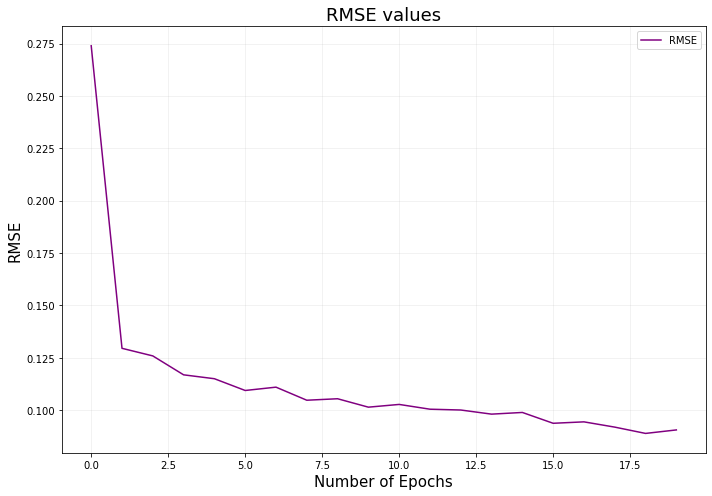

In [22]:
plt.figure(figsize=(10,7))

plt.plot(learn.epoch, learn.history['root_mean_squared_error'], label='RMSE', color='purple')

plt.title('RMSE values', fontsize=18)
plt.xlabel('Number of Epochs', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.grid(alpha=0.2)

plt.legend()

plt.tight_layout()
plt.show()

### Preparing test data

In [23]:
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [24]:
test_data = pdd.DataReader(f'{cryptocurrency}-{currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [25]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [26]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [27]:
x_test = []

In [28]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Visualizing Model Prediction

In [29]:
# making predictions
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

30/30 [==============================] - 1s 13ms/step


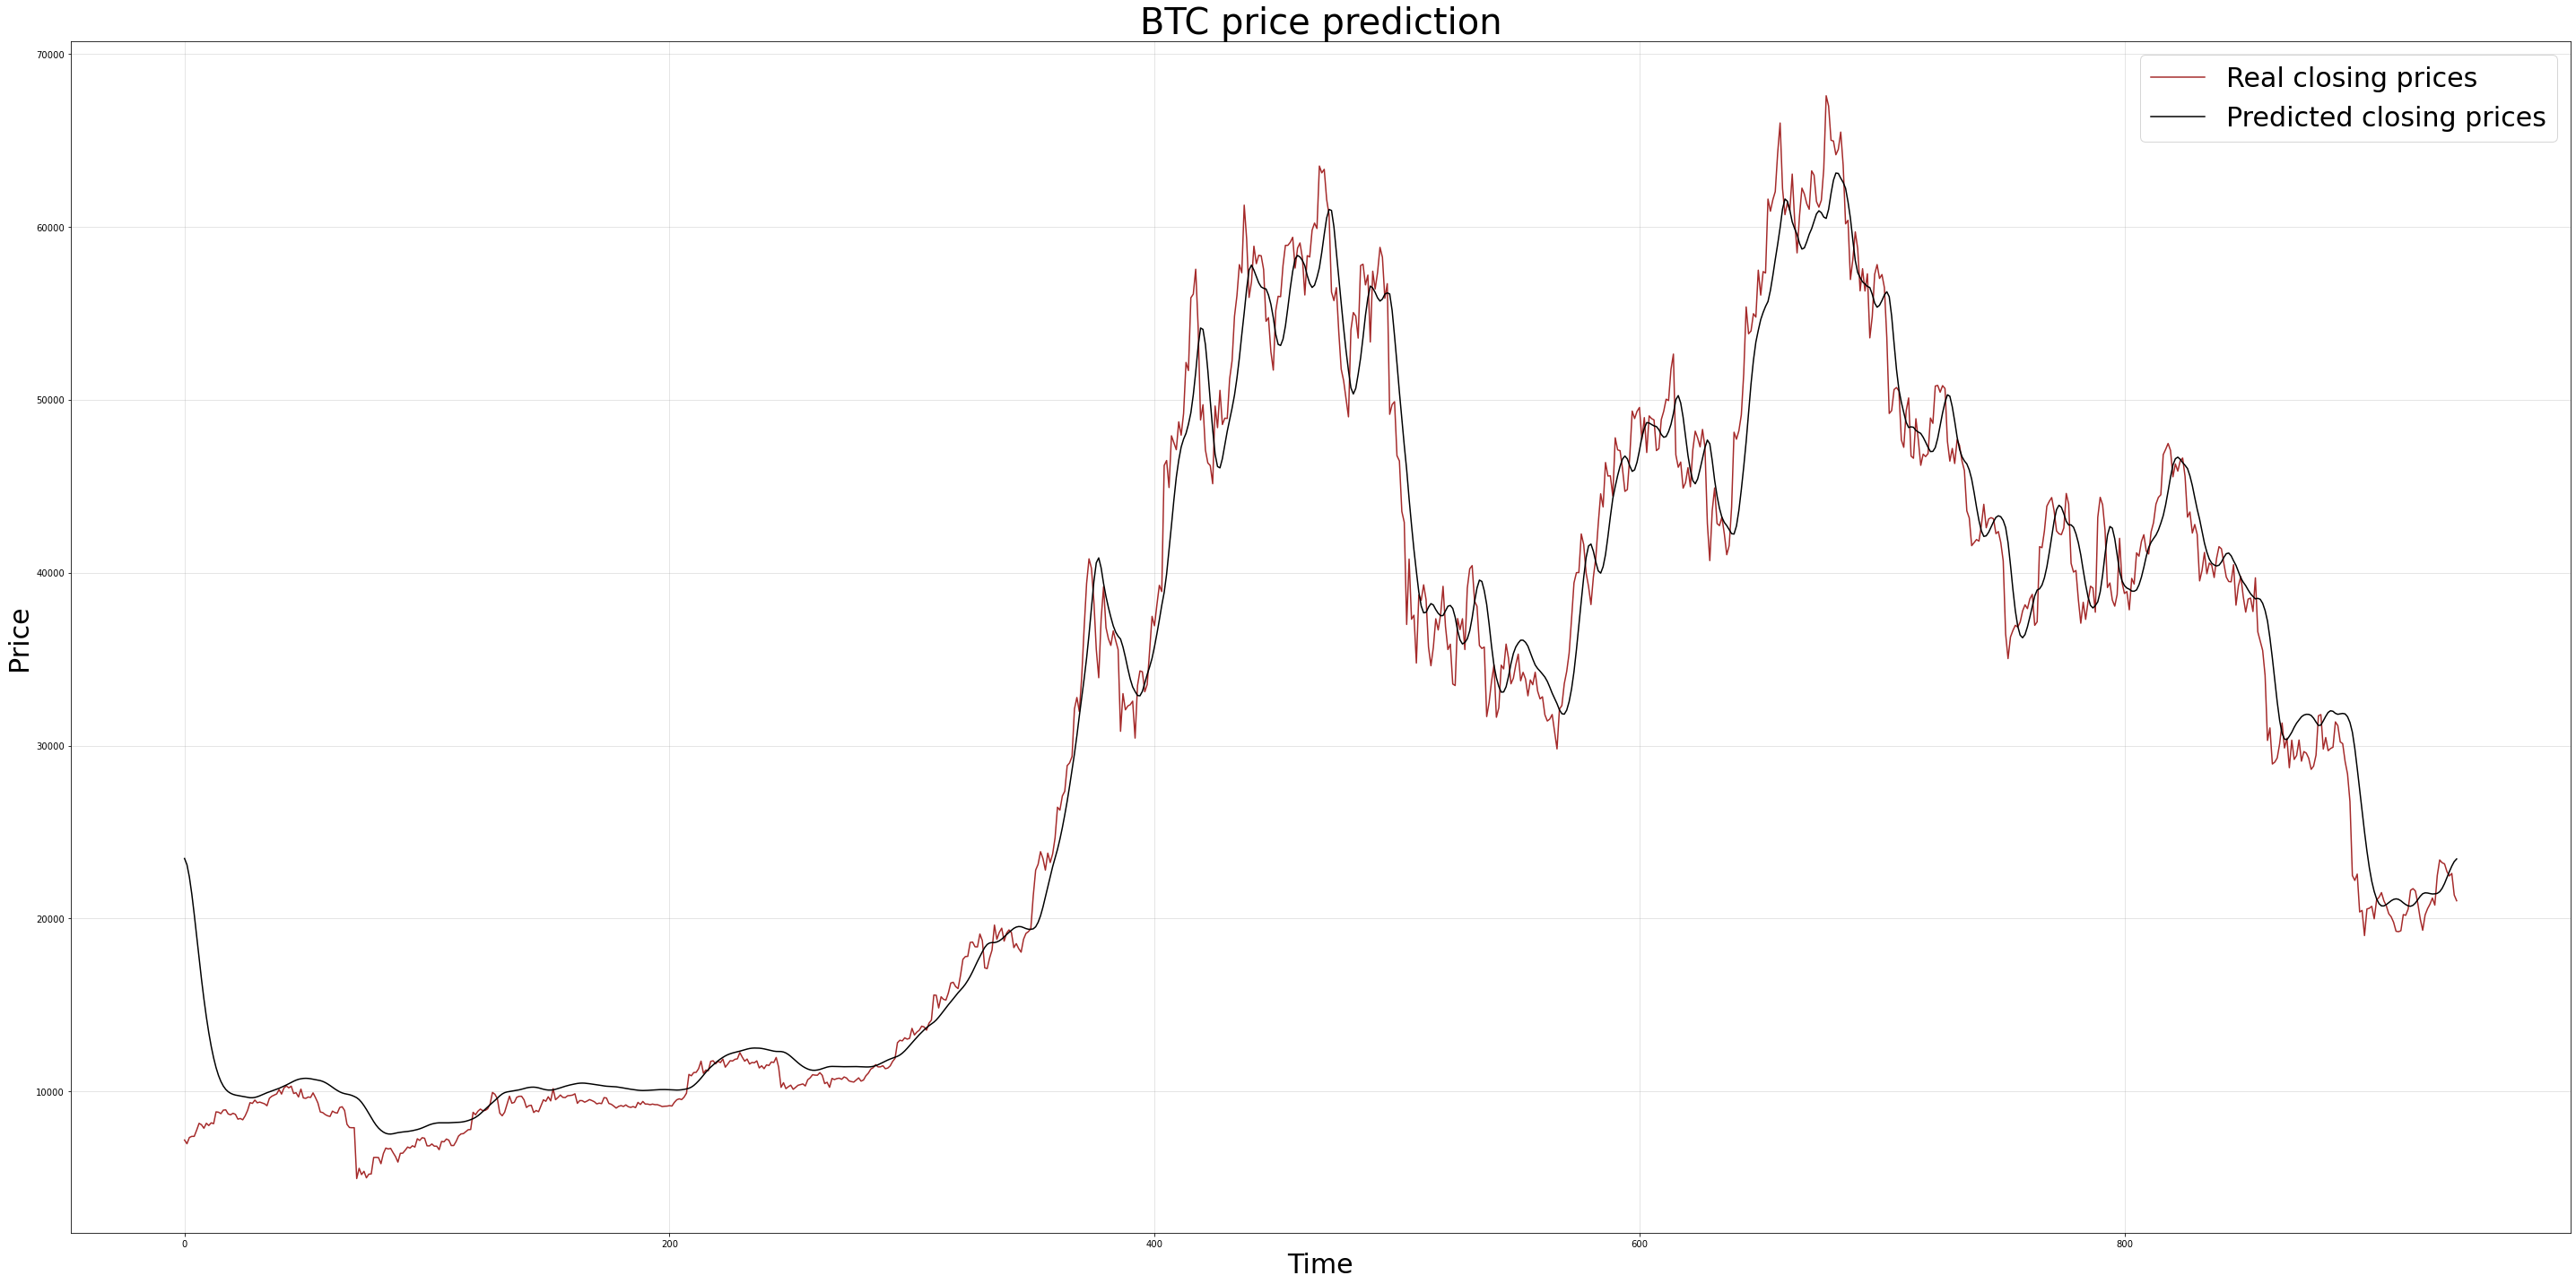

In [30]:
plt.figure(figsize=(40,20))
plt.plot(actual_prices, color='brown', label='Real closing prices')
plt.plot(prediction_prices, color='black', label='Predicted closing prices')

plt.title('BTC price prediction', fontsize=40)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.legend(fontsize=30)
plt.grid(alpha=0.4)


plt.tight_layout()
plt.show()

# double click image for an enlarged view and double click again to revert to normal size

### Accuracy Score

In [31]:
acc = r2(actual_prices, prediction_prices)
print(f'R2 Score: {acc*100:.2f}%')

R2 Score: 97.86%


In [40]:
!git init

Initialized empty Git repository in C:/Users/adeto/Documents/femi/.git/
